# Exercici 1

Descarrega el dataset adjunt preu lloguer per trimestre i barri.csv extret de la web OpenDataBCN i resumeix-lo estadísticament i gràficament.

Crea almenys una visualització per:

- Una variable categòrica (Districte o Barri) <br>
- Una variable numèrica (Preu) <br>
- Una variable numèrica i una categòrica (Districte i Preu)<br>
- Dues variables numèriques (Any o Trimestre i Preu) <br>
- Tres variables (Barri o Districte, Trimestre i Preu) <br>

In [1]:
# Importem les llibreries necessàries que utilitzarem en tot el notebook
import pandas as pd 
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

# Eliminem el tamany màxim d'amplada de la columna perquè ens apareix amb (...) 
# i també eliminem limitacions en el nombre de columnes que es mostren sense truncament (és a dir, que el text queda tallat)
pd.set_option('display.max_colwidth', None) 
pd.set_option('display.max_columns', None)

# Especifiquem la ruta del fitxer que hem descarregat
ruta_fitxer = 'C:/Users/Ariadna/Desktop/IT ACADEMY/ESPECIALITZACIÓ/SPRINT 4/preu lloguer per trimestre i barri.csv'

# Carreguem el dataframe des del fitxer 
df_preulloguer = pd.read_csv(ruta_fitxer)

df_preulloguer.head(10)

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0
5,2021,1,2,Eixample,6,la Sagrada Família,Lloguer mitjà mensual (Euros/mes),887.1
6,2021,1,2,Eixample,7,la Dreta de l'Eixample,Lloguer mitjà mensual (Euros/mes),1176.7
7,2021,1,2,Eixample,8,l'Antiga Esquerra de l'Eixample,Lloguer mitjà mensual (Euros/mes),1040.2
8,2021,1,2,Eixample,9,la Nova Esquerra de l'Eixample,Lloguer mitjà mensual (Euros/mes),964.0
9,2021,1,2,Eixample,10,Sant Antoni,Lloguer mitjà mensual (Euros/mes),898.7


In [2]:
# Observem els resums estadístics de cada variable del dataset
df_preulloguer.describe()

,Any,Trimestre,Codi_Districte,Codi_Barri
count,584.0,584.000000,584.000000,584.000000
mean,2021.0,2.500000,6.246575,37.000000
std,0.0,1.118992,2.790726,21.089371
min,2021.0,1.000000,1.000000,1.000000
25%,2021.0,1.750000,4.000000,19.000000
50%,2021.0,2.500000,7.000000,37.000000
75%,2021.0,3.250000,8.000000,55.000000
max,2021.0,4.000000,10.000000,73.000000


Amb aquests resultats podem extreure la següent informació:
- El dataset conté 584 registres.
- Els valors de la variable 'Any' són constants, ja que el dataset només conté informació sobre el 2021. 
- Quant a la variable 'Trimestre', els valors semblen correctes, en el rang de 1 (gener a març) a 4 (octubre a desembre).
- La variable 'Codi_Districte' ens indica de quin districte es tracta. El que podem mirar després és de quants districtes diferents tenim informació i quins són.
- 'Codi_Barri' és un valor que indentifica el barri (al igual que 'Codi_Districte')

Com que en aquests càlculs estadístics no s'inclou justament la variable que ens interessa, que és el preu del lloguer, mirarem de quin tipus de variable es tracta.

In [3]:
tipus_variables = df_preulloguer.dtypes
print(tipus_variables)

Any                int64
Trimestre          int64
Codi_Districte     int64
Nom_Districte     object
Codi_Barri         int64
Nom_Barri         object
Lloguer_mitja     object
Preu              object
dtype: object


Veiem que la variable 'Preu' és del tipus object, per aquest motiu la transformarem a un valor numèric.

In [3]:
# Per convertir la variable 'Preu' a un valor numèric utilitzem la funció pd.to_numeric()
# L'argument errors='corce' fa que es converteixi qualsevol no numèric com '--' a 'NaN'
df_preulloguer['Preu'] = pd.to_numeric(df_preulloguer['Preu'], errors='coerce')

In [4]:
tipus_variables = df_preulloguer.dtypes
print(tipus_variables)

Any                 int64
Trimestre           int64
Codi_Districte      int64
Nom_Districte      object
Codi_Barri          int64
Nom_Barri          object
Lloguer_mitja      object
Preu              float64
dtype: object


Com podem veure, ara la variable 'Preu' és del tipus float. Ara podrem observar els resultats estadístics d'aquesta variable.

In [5]:
# Observem un resum estadístic de la variable 'Preu'
df_preulloguer['Preu'].describe()

count     540.000000
mean      442.157222
std       457.358745
min         6.700000
25%        12.775000
50%       232.750000
75%       815.875000
max      1816.500000
Name: Preu, dtype: float64

Podem extreure la següent informació:
- Tenim informació sobre el preu en 540 registres dels 584, per tant hi ha valors nuls.
- El preu mínim és de 6.70, clarament un valor incorrecte (pensem que per error es va col.locar una coma i serien 670€)
- El preu mitjà del lloguer és de 442€. Valor clarament baix, que suposem que serà erroni degut a l'error detectat i els valors nuls. 
- El preu màxim és de 1.816,50€
- El 1r quartil el tenim en 12.78€ (valor que tampoc té sentit, al igual que el del preu mínim)
- La mediana o 2n quartil la tenim a 232€ (valor que ens sembla molt baix).
- El 3r quartil el tenim a 815,87€.

In [6]:
# Comprovem que efectivament hi ha valors nuls en la variable 'Preu':

df_preulloguer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Any             584 non-null    int64  
 1   Trimestre       584 non-null    int64  
 2   Codi_Districte  584 non-null    int64  
 3   Nom_Districte   584 non-null    object 
 4   Codi_Barri      584 non-null    int64  
 5   Nom_Barri       584 non-null    object 
 6   Lloguer_mitja   584 non-null    object 
 7   Preu            540 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 36.6+ KB


Ara farem un resum gràfic de la variable 'Preu' a través d'un boxplot.

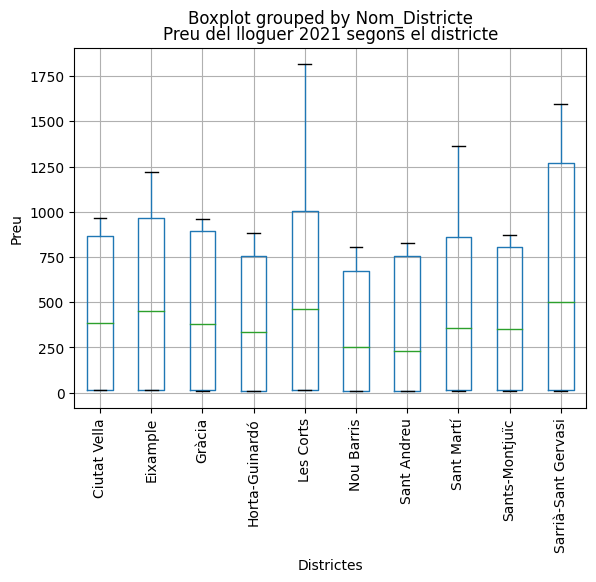

In [7]:
df_preulloguer.boxplot(column='Preu', by='Nom_Districte') # Creem el boxplot de la variable 'Preu', 
                                                          # segons la variable 'Nom_Districte'
plt.title('Preu del lloguer 2021 segons el districte') # Definim el títol del gràfic
plt.xlabel('Districtes') # Definim el nom de l'eix de les x
plt.ylabel('Preu') # Definim el nom de l'eix de les y

# Canviem la orientació de les etiquetes dels noms perquè no es vegin superposades
plt.xticks(rotation=90)

# Mostrem el gràfic
plt.show()

Ara crearem un gràfic per veure l'evolució del preu del lloguer segons el trimestre.

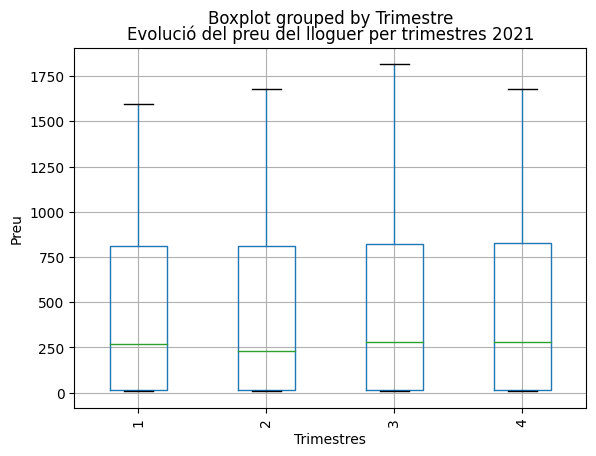

In [31]:
df_preulloguer.boxplot(column='Preu', by='Trimestre') # Creem el boxplot de la variable 'Preu', segons la variable 'Trimestre'
plt.title("Evolució del preu del lloguer per trimestres 2021")     
plt.xlabel('Trimestres') # Definim el nom de l'eix de les x
plt.ylabel('Preu') # Definim el nom de l'eix de les y

# Canviem la orientació de les etiquetes dels noms perquè no es vegin superposades
plt.xticks(rotation=90)

# Mostrem el gràfic
plt.show()

Creem un gràfic de representació de la variable 'Preu' a través d'un histograma amb Seaborn.

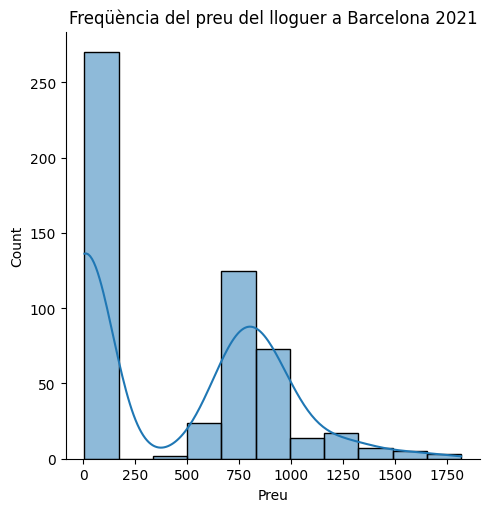

In [28]:
import seaborn as sns # Importem la llibreria Seaborn

sns.displot(df_preulloguer['Preu'], kde=True) # Creem el diagrama de distribució

# Afegim un títol al nostre gràfic
plt.title("Freqüència del preu del lloguer a Barcelona 2021")

# Mostrem el gràfic
plt.show()


Aquest histograma ens permet adonar-nos que continuem tenint valors nuls en el nostre dataset, però no com a NaN, sinó com a 0.
Si no fós per això, l'histograma segueix una distribució normal amb cua a la dreta. 
Aquests valors nuls doncs, s'hauran de substituir o eliminar del nostre dataset prèviament per poder obtenir una visualització correcta de les dades.

Creem un gràfic de representació de la variable categòrica 'Nom_Districte' a través d'un diagrama de barres.

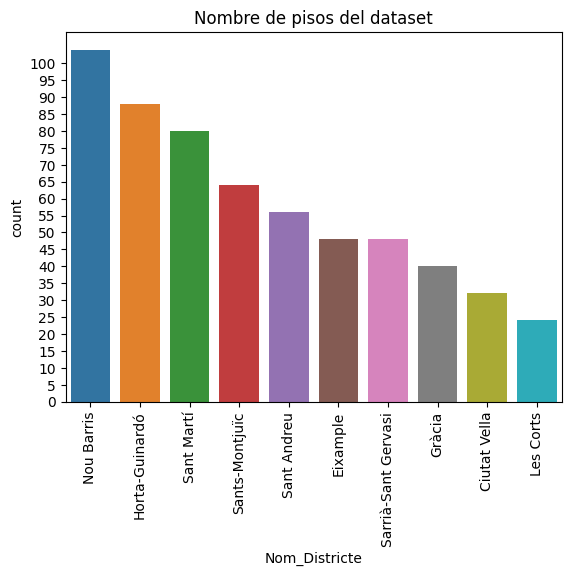

In [27]:
# Calculem el comptatge de cada districte
districte_counts = df_preulloguer['Nom_Districte'].value_counts()

# Creem el diagrama de barres amb l'ordre especificat
sns.countplot(x=df_preulloguer['Nom_Districte'], order=districte_counts.index)

# Ajustem les etiquetes de l'eix y per mostrar valors més concrets
plt.yticks(range(0, max(districte_counts)+1, 5)) # Indiquem que volem increments de 5 en 5 en els valors 

# Ajustem les etiquetes de l'eix y per no veure-les sobreposades
plt.setp(plt.gca().get_xticklabels(), rotation=90)

# Afegim un títol al nostre gràfic
plt.title("Nombre de pisos del dataset")

# Mostrem el gràfic
plt.show()

Mitjançant el diagrama de barres, veiem que Nou Barris és el barri més representat en el nostra dataset, amb més de 100 pisos, mentre que Les Corts és el  menys representat, amb uns 25 pisos aproximadament.

Crearem una taula pivot i la visualitzarem amb un mapa de calor (heatmap). Les variables escollides són 'Nom_Districte', 'Trimestre' i 'Preu'.

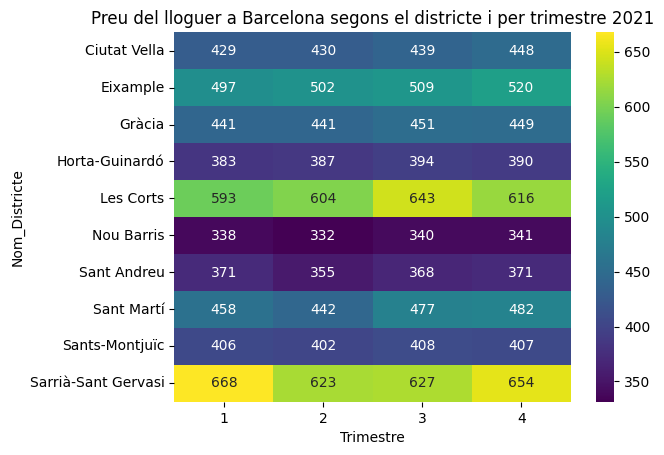

In [29]:
# Definim una funció de formateig per als valors del heatmap, que utilitzarem al dibuixar el gràfic.
def format_func(val):
    return "{:.0f}".format(val)

# Creem una taula pivot
pivot_table = df_preulloguer.pivot_table(index='Nom_Districte', columns='Trimestre', values= 'Preu', aggfunc='mean')

# Creem el mapa de calor amb els valors formatejats
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt=".0f")

# Afegim un títol al nostre gràfic
plt.title("Preu del lloguer a Barcelona segons el districte i per trimestre 2021")

# Mostrem el gràfic
plt.show()

Com podem veure, el mapa de calor és una bona eina en aquest cas perquè ens permet veure fàcilment la mitjana de preus per cada districte i ràpidament identificar aquells preus més elevats gràcies als diferents colors (verd i groc, en el Districte de Les Corts i Sarrià-Sant Gervasi) mentre que els més baixos els trobem a Nou Barris i després a Sant Andreu. Alhora, ens permet veure l'evolució del preu per trimestres.

# Exercici 2

Exporta els gràfics com imatges o com HTML.

<Figure size 800x600 with 0 Axes>

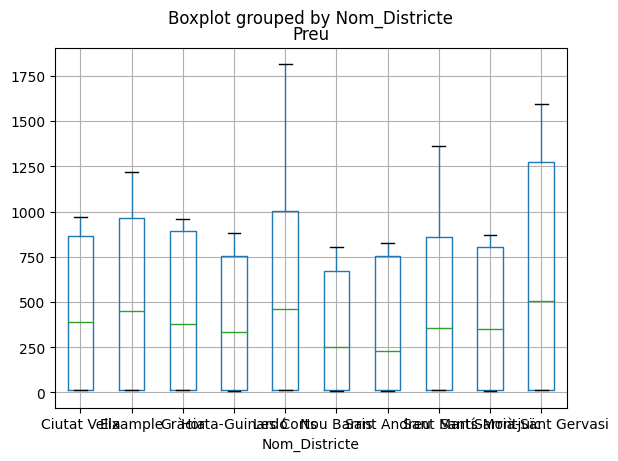

<Figure size 800x600 with 0 Axes>

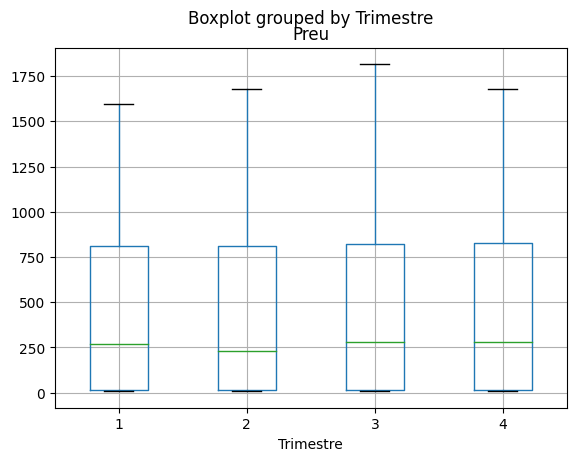

<Figure size 800x600 with 0 Axes>

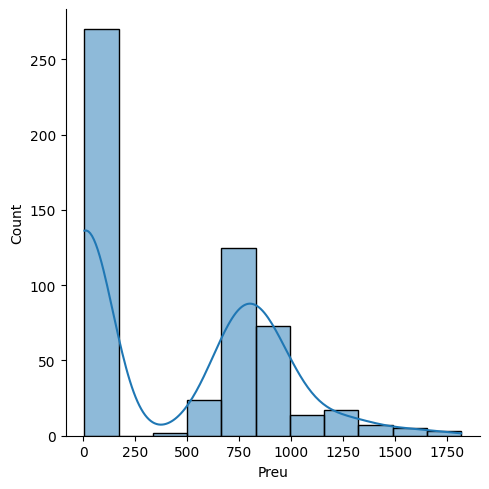

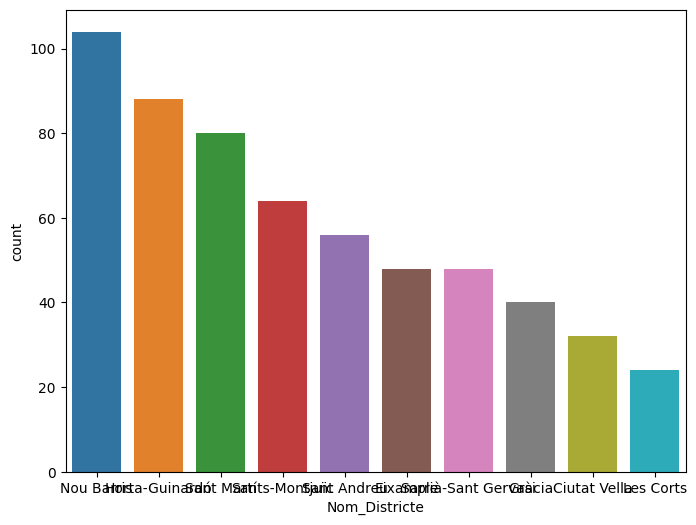

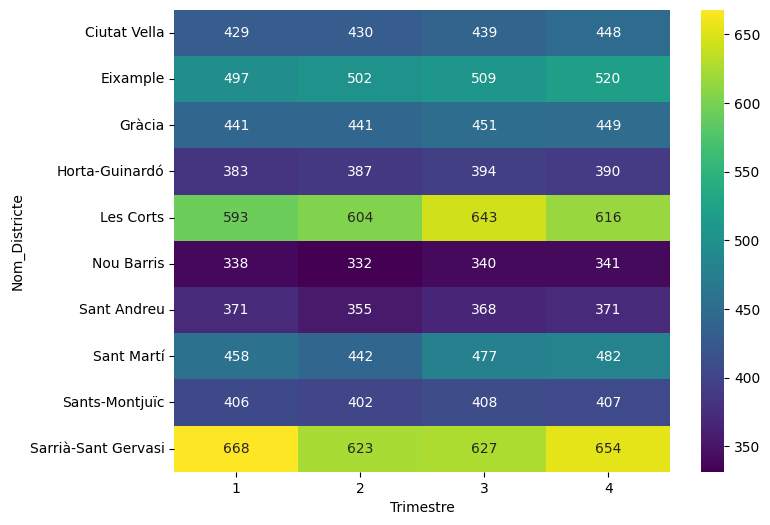

In [32]:
# Exportem el boxplot 'Preu del lloguer 2021'
plt.figure(figsize=(8, 6))  # Ajustem la mida del gràfic
df_preulloguer.boxplot(column='Preu', by='Nom_Districte')  # Especifiquem quin gràfic volem exportar
plt.savefig('grafic1.png', format='png', dpi=300)

# Exportem el boxplot 'Evolució del preu del lloguer per trimestres 2021'
plt.figure(figsize=(8, 6))  # Ajustem la mida del gràfic
df_preulloguer.boxplot(column='Preu', by='Trimestre')  # Especifiquem quin gràfic volem exportar
plt.savefig('grafic2.png', format='png', dpi=300)

# Exportem el diagrama de distribució "Evolució del preu del lloguer a Barcelona 2021"
plt.figure(figsize=(8, 6))  # Ajustem la mida del gràfic
sns.displot(df_preulloguer['Preu'], kde=True)  # Especifiquem quin gràfic volem exportar
plt.savefig('grafic3.png', format='png', dpi=300)

# Exportem el diagrama de barres 'Nombre de pisos del dataset'
plt.figure(figsize=(8, 6))  # Ajustem la mida del gràfic
sns.countplot(x=df_preulloguer['Nom_Districte'], order=districte_counts.index)  # Especifiquem quin gràfic volem exportar
plt.savefig('grafic4.png', format='png', dpi=300)

# Exportem el mapa de calor 'Preu del lloguer a Barcelona segons el districte i per trimestre 2021'
plt.figure(figsize=(8, 6))  # Ajustem la mida del gràfic
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt=".0f")  # Especifiquem quin gràfic volem exportar
plt.savefig('grafic5.png', format='png', dpi=300)


# Exercici 3

Proposa alguna visualització que creguis que pot resultar interessant.

També podríem haver creat un gràfic circular per a representar els pisos del nostre dataset.

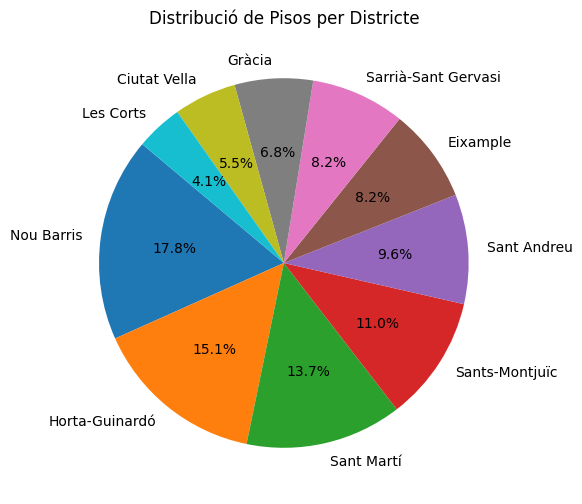

In [33]:
# Calculem el comptatge de cada districte
districte_counts = df_preulloguer['Nom_Districte'].value_counts()

# Definim les dades per al gràfic circular
categories = districte_counts.index
values = districte_counts.values

# Configurem el gràfic circular
plt.figure(figsize=(6, 6))  # Ajusta la mida del gràfic si és necessari
plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=140)

# Afegim un títol
plt.title('Distribució de Pisos per Districte')

# Mostrem el gràfic
plt.show()



També podem crear un violinplot per comparar la distribució del preu del lloguer en cada districte

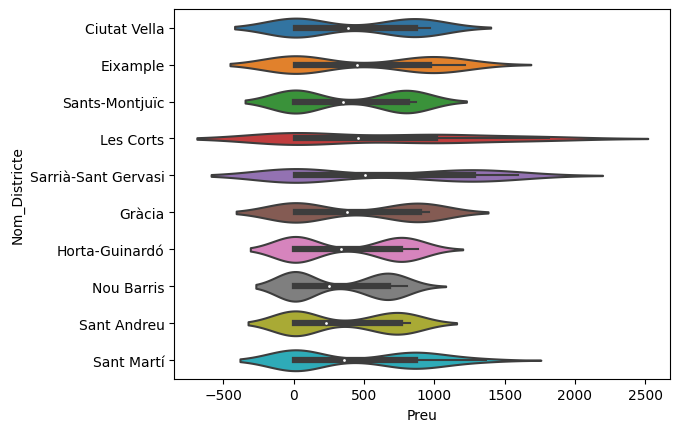

In [39]:
# Creem un violinplot seleccionant el preu en l'eix x i el districte en l'eix y
sns.violinplot(data=df_preulloguer, x="Preu", y="Nom_Districte")

# Mostrem la visualització
plt.show()


D'aquesta manera podem visualitzar clarament la distribució dels preus en cada districte. Com podem veure, els preus a Les Corts i a Sarrià-Sant Gervasi tenen molta variació, mentre que en barris com Nou Barris o Sant Andreu el preu no és tan variable. 
No obstant, com hem dit anteriorment, caldria fer una neteja dels valors nuls (preu lloguer igual a 0), perquè ens distorsionen els resultats.